In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

1.13.1


In [9]:
Mnist= tf.keras.datasets.mnist

In [17]:
(train_images, train_labels),(test_images, test_labels)=Mnist.load_data ()

In [18]:
class_names = ['zero', 'one', 'two', 'three', 'four', 
               'five', 'six', 'seven', 'eight', 'nine']

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
len(train_labels)

60000

In [21]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
test_images.shape

(10000, 28, 28)

In [23]:
len(test_labels)

10000

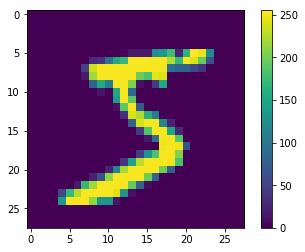

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

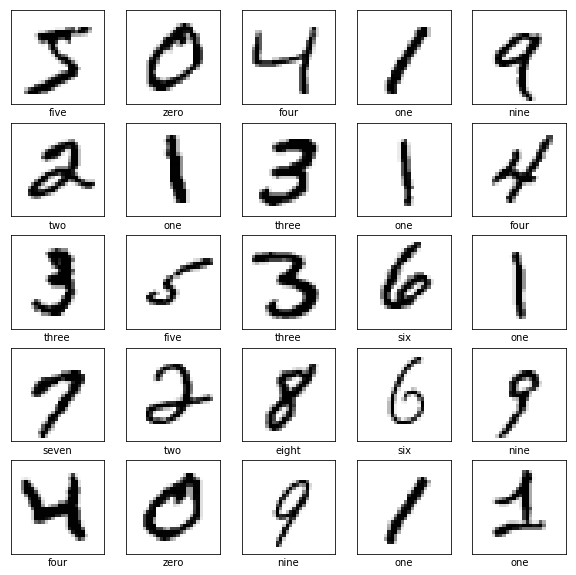

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0076 - acc: 0.9976
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0075 - acc: 0.9976
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0063 - acc: 0.9980
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0055 - acc: 0.9983
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0068 - acc: 0.9979
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0055 - acc: 0.9982
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0033 - acc: 0.9990
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0059 - acc: 0.9980
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0035 - acc: 0.9991
Epoch 10/10
60000/60000 [==============================] - 4s 68us/sample - loss: 

In [57]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.1136 - acc: 0.9784
Test accuracy: 0.9784


In [58]:
predictions = model.predict(test_images)

In [59]:
predictions[0]

array([1.01762065e-08, 3.93575896e-19, 2.03669438e-12, 9.76845982e-09,
       2.99560389e-21, 7.02480263e-16, 3.97319974e-19, 1.00000000e+00,
       2.70330697e-16, 2.29431751e-10], dtype=float32)

In [60]:
np.argmax(predictions[0])

7

In [61]:
test_labels[0]

7

In [62]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

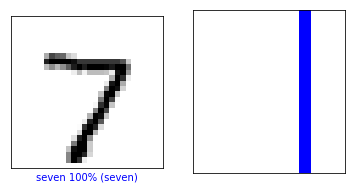

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

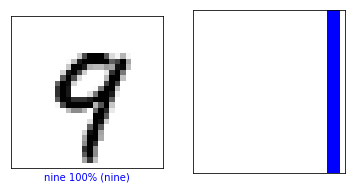

In [64]:
i = 96
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

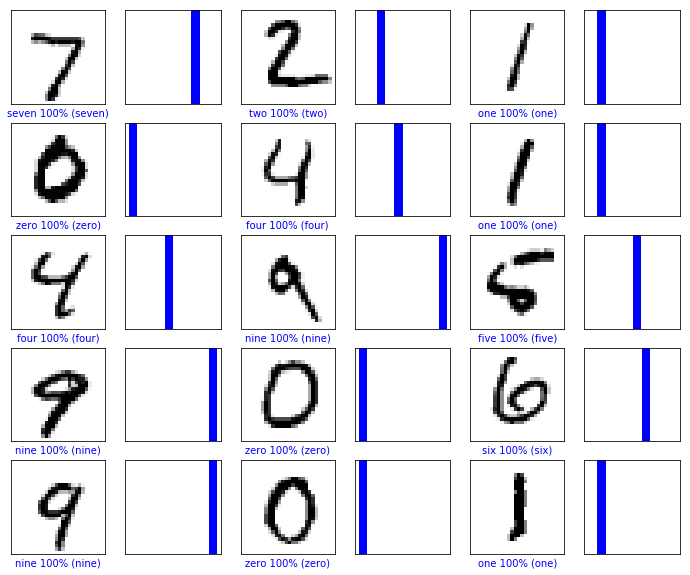

In [65]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [66]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [67]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [68]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0176187e-08 3.9357287e-19 2.0366983e-12 9.7684598e-09 2.9955811e-21
  7.0247756e-16 3.9731997e-19 1.0000000e+00 2.7033070e-16 2.2943220e-10]]


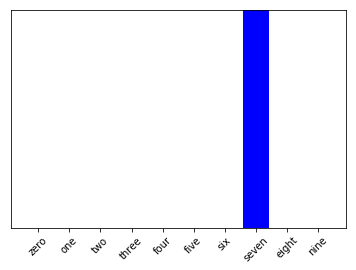

In [69]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [70]:
np.argmax(predictions_single[0])

7